## 10 minutes to pandas [🔗](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

This code is written for a quick recap on major functions of Pandas using **Diamonds** dataset of Seaborn. Based on '10 minutes to pandas' document, added and modified code for learning and experimenting.

In [2]:
import pandas as pd
import numpy as np

### Object creation

In [4]:
# Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
# DataFrame
## From Numpy array, with datetime index
dates = pd.date_range('20130101', periods=6)
print(dates)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-01-01,-2.455095,0.117467,0.440697,1.158470
2013-01-02,0.048671,1.176404,0.560179,0.336313
2013-01-03,-1.465126,0.016920,1.132252,0.086282
2013-01-04,0.061281,1.175873,0.160681,1.051633
2013-01-05,-0.986781,0.170562,0.147829,1.566041
2013-01-06,-0.211155,0.917595,-0.522817,-1.663094


In [6]:
## From Dictionary
df2 = pd.DataFrame({'A': 1.0,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(['test', 'train', 'test', 'train']),
                    'F': 'foo',
                   })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
# Check dtypes of df2
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

### Viewing data

In [9]:
# load 'diamonds' data for practice
import seaborn as sns

df = sns.load_dataset('diamonds')

In [10]:
# view the top rows
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# view the bottom rows
df.tail(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [12]:
# index
df.index

RangeIndex(start=0, stop=53940, step=1)

In [13]:
# columns
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [14]:
# NumPy representation of the underlying data
df.to_numpy()

array([[0.23, 'Ideal', 'E', ..., 3.95, 3.98, 2.43],
       [0.21, 'Premium', 'E', ..., 3.89, 3.84, 2.31],
       [0.23, 'Good', 'E', ..., 4.05, 4.07, 2.31],
       ...,
       [0.7, 'Very Good', 'D', ..., 5.66, 5.68, 3.56],
       [0.86, 'Premium', 'H', ..., 6.15, 6.12, 3.74],
       [0.75, 'Ideal', 'D', ..., 5.83, 5.87, 3.64]], dtype=object)

In [15]:
# Statistic summary
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [17]:
df.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [18]:
# Transpose
df.T

,0,1,2,3,4,5,6,7,8,9,...,53930,53931,53932,53933,53934,53935,53936,53937,53938,53939
carat,0.23,0.21,0.23,0.29,0.31,0.24,0.24,0.26,0.22,0.23,...,0.71,0.71,0.7,0.7,0.72,0.72,0.72,0.7,0.86,0.75
cut,Ideal,Premium,Good,Premium,Good,Very Good,Very Good,Very Good,Fair,Very Good,...,Premium,Premium,Very Good,Very Good,Premium,Ideal,Good,Very Good,Premium,Ideal
color,E,E,E,I,J,J,I,H,E,H,...,E,F,E,E,D,D,D,D,H,D
clarity,SI2,SI1,VS1,VS2,SI2,VVS2,VVS1,SI1,VS2,VS1,...,SI1,SI1,VS2,VS2,SI1,SI1,SI1,SI1,SI2,SI2
depth,61.5,59.8,56.9,62.4,63.3,62.8,62.3,61.9,65.1,59.4,...,60.5,59.8,60.5,61.2,62.7,60.8,63.1,62.8,61.0,62.2
table,55.0,61.0,65.0,58.0,58.0,57.0,57.0,55.0,61.0,61.0,...,55.0,62.0,59.0,59.0,59.0,57.0,55.0,60.0,58.0,55.0
price,326,326,327,334,335,336,336,337,337,338,...,2756,2756,2757,2757,2757,2757,2757,2757,2757,2757
x,3.95,3.89,4.05,4.2,4.34,3.94,3.95,4.07,3.87,4.0,...,5.79,5.74,5.71,5.69,5.69,5.75,5.69,5.66,6.15,5.83
y,3.98,3.84,4.07,4.23,4.35,3.96,3.98,4.11,3.78,4.05,...,5.74,5.73,5.76,5.72,5.73,5.76,5.75,5.68,6.12,5.87
z,2.43,2.31,2.31,2.63,2.75,2.48,2.47,2.53,2.49,2.39,...,3.49,3.43,3.47,3.49,3.58,3.5,3.61,3.56,3.74,3.64


In [19]:
# Sort by an axis
## axis=0: index, axis=1: columns
df.sort_index(axis=1, ascending=False)

,z,y,x,table,price,depth,cut,color,clarity,carat
0,2.43,3.98,3.95,55.0,326,61.5,Ideal,E,SI2,0.23
1,2.31,3.84,3.89,61.0,326,59.8,Premium,E,SI1,0.21
2,2.31,4.07,4.05,65.0,327,56.9,Good,E,VS1,0.23
3,2.63,4.23,4.20,58.0,334,62.4,Premium,I,VS2,0.29
4,2.75,4.35,4.34,58.0,335,63.3,Good,J,SI2,0.31
...,...,...,...,...,...,...,...,...,...,...
53935,3.50,5.76,5.75,57.0,2757,60.8,Ideal,D,SI1,0.72
53936,3.61,5.75,5.69,55.0,2757,63.1,Good,D,SI1,0.72
53937,3.56,5.68,5.66,60.0,2757,62.8,Very Good,D,SI1,0.70
53938,3.74,6.12,6.15,58.0,2757,61.0,Premium,H,SI2,0.86


In [20]:
# Sort by values
df.sort_values(by='carat')

,carat,cut,color,clarity,depth,table,price,x,y,z
31593,0.20,Premium,E,VS2,61.1,59.0,367,3.81,3.78,2.32
31597,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
31596,0.20,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33
31595,0.20,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30
31594,0.20,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28
...,...,...,...,...,...,...,...,...,...,...
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


### Selection

In [22]:
# Select a column and yield a Series 1
df['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [23]:
# Select a column and yield a Series 2
df.carat

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [24]:
# Select matching rows
df[0:3]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [25]:
# Selection by label using df.loc, df.at
print('Row label:', 0)
df.loc[0]

Row label: 0


carat       0.23
cut        Ideal
color          E
clarity      SI2
depth       61.5
table       55.0
price        326
x           3.95
y           3.98
z           2.43
Name: 0, dtype: object

In [26]:
# Select all rows and some columns
df.loc[:, ['carat', 'cut']]

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good
...,...,...
53935,0.72,Ideal
53936,0.72,Good
53937,0.70,Very Good
53938,0.86,Premium


In [27]:
# Select certain rows and columns
df.loc[0:3, ['carat', 'cut', 'clarity']]

,carat,cut,clarity
0,0.23,Ideal,SI2
1,0.21,Premium,SI1
2,0.23,Good,VS1
3,0.29,Premium,VS2


In [28]:
# Select a single value
df.loc[0, 'carat']

0.23

In [29]:
# df.at[]: Access a single value for a row/column label pair
df.at[0, 'carat']

0.23

In [30]:
# Select by position using df.iloc, df.iat
df.iloc[3]

carat         0.29
cut        Premium
color            I
clarity        VS2
depth         62.4
table         58.0
price          334
x              4.2
y             4.23
z             2.63
Name: 3, dtype: object

In [31]:
# Selection with slicing
df.iloc[3:5, 0:2]

,carat,cut
3,0.29,Premium
4,0.31,Good


In [32]:
# Selection of certain rows and columns
df.iloc[[1, 2, 4], [0, 2]]

,carat,color
1,0.21,E
2,0.23,E
4,0.31,J


In [33]:
# Selection of specific value
df.iloc[1, 1]

'Premium'

In [34]:
# Selection of specific value usic iat()
df.iat[1, 1]

'Premium'

In [35]:
# Boolean indexing
df[df['carat'] > 3]

,carat,cut,color,clarity,depth,table,price,x,y,z
19339,3.01,Premium,I,I1,62.7,58.0,8040,9.10,8.97,5.67
21758,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
21862,3.01,Premium,F,I1,62.2,56.0,9925,9.24,9.13,5.73
22428,3.05,Premium,E,I1,60.9,58.0,10453,9.26,9.25,5.66
22540,3.02,Fair,I,I1,65.2,56.0,10577,9.11,9.02,5.91
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24131,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85
24297,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03


In [36]:
# Select with boolean condition
df[df[['x', 'y', 'z']] > 10].loc[:, ['x', 'y', 'z']]

,x,y,z
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
53935,NaN,NaN,NaN
53936,NaN,NaN,NaN
53937,NaN,NaN,NaN
53938,NaN,NaN,NaN


In [37]:
df[df['color'].isin(['H', 'I'])]

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
...,...,...,...,...,...,...,...,...,...,...
53919,0.76,Ideal,I,VVS1,62.2,55.0,2753,5.89,5.87,3.66
53923,0.73,Ideal,I,VS2,61.3,56.0,2756,5.80,5.84,3.57
53924,0.73,Ideal,I,VS2,61.6,55.0,2756,5.82,5.84,3.59
53925,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67


### Setting

In [39]:
# Setting a new column
# Make a Series with random numbers from 0-10, and add index from 1 to 53939
s1 = pd.Series(np.round(np.random.rand(len(df)-1)*10, 2), index=pd.RangeIndex(1, len(df)))
s1

1        3.30
2        2.16
3        4.20
4        3.98
5        3.55
         ... 
53935    3.49
53936    5.06
53937    8.72
53938    8.51
53939    3.03
Length: 53939, dtype: float64

In [40]:
# Make new column 'alpha'
df['alpha'] = s1
df

,carat,cut,color,clarity,depth,table,price,x,y,z,alpha
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,NaN
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.30
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.16
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.20
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3.98
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.49
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,5.06
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,8.72
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,8.51


In [41]:
# Setting values by label
df.at[0, 'carat'] = 0.32
df

,carat,cut,color,clarity,depth,table,price,x,y,z,alpha
0,0.32,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,NaN
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.30
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.16
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.20
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3.98
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.49
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,5.06
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,8.72
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,8.51


In [42]:
# Setting value by position
df.iat[0, 1] = 'Good'
df

,carat,cut,color,clarity,depth,table,price,x,y,z,alpha
0,0.32,Good,E,SI2,61.5,55.0,326,3.95,3.98,2.43,NaN
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3.30
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.16
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.20
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,3.98
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.49
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,5.06
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,8.72
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,8.51


In [43]:
# Select by assigning NumPy array
df.loc[:, 'z'] = np.array([3.54] * len(df))
df

,carat,cut,color,clarity,depth,table,price,x,y,z,alpha
0,0.32,Good,E,SI2,61.5,55.0,326,3.95,3.98,3.54,NaN
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,3.54,3.30
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,3.54,2.16
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,3.54,4.20
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,3.54,3.98
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.54,3.49
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.54,5.06
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.54,8.72
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.54,8.51


### Missing data

In [45]:
df = sns.load_dataset('diamonds')

In [46]:
# Reindex to change/add/delete the index on a specific axis
df1 = df.reindex(index=range(10), columns=list(df.columns) + ['beta'])
df1.loc[0:3, 'beta'] = 1
df1

,carat,cut,color,clarity,depth,table,price,x,y,z,beta
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,NaN
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,NaN
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,NaN
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,NaN
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,NaN
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,NaN


In [47]:
# Drop any rows with missing data
df1.dropna(how='any') # how='all': if all values are NA

,carat,cut,color,clarity,depth,table,price,x,y,z,beta
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1.0


In [48]:
# Fill missing data with a value
df1['beta'].fillna(value=5)

0    1.0
1    1.0
2    1.0
3    1.0
4    5.0
5    5.0
6    5.0
7    5.0
8    5.0
9    5.0
Name: beta, dtype: float64

In [49]:
# Fill with dictionary
v = {'alpha': 5, 'beta':0}
df1.fillna(value=v)

,carat,cut,color,clarity,depth,table,price,x,y,z,beta
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0.0
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,0.0
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,0.0
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,0.0
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,0.0


In [50]:
# Set limit to filling
df1.fillna(value=v, limit=2)

,carat,cut,color,clarity,depth,table,price,x,y,z,beta
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0.0
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,NaN
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,NaN
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,NaN
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,NaN


In [51]:
# Use ffill: Get a value from the previous row
df1.ffill()

,carat,cut,color,clarity,depth,table,price,x,y,z,beta
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,1.0
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,1.0
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,1.0
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1.0
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,1.0


In [52]:
# Use bfill: Get a value from the next row
df1.bfill()

,carat,cut,color,clarity,depth,table,price,x,y,z,beta
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,NaN
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,NaN
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,NaN
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,NaN
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,NaN
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,NaN


In [53]:
pd.isna(df1)

,carat,cut,color,clarity,depth,table,price,x,y,z,beta
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,True


### Stats

In [55]:
# Mean for each column
df.mean(numeric_only=True)

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [56]:
# Standard Variation for each row
df.std(axis=1, numeric_only=True)

0         118.176020
1         118.156815
2         118.504005
3         121.014658
4         121.343505
            ...     
53935    1033.963155
53936    1033.945435
53937    1033.686778
53938    1033.819446
53939    1033.975216
Length: 53940, dtype: float64

In [57]:
# Correlation Matrix
df.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


### User defined functions

In [59]:
# df.agg(): Applies a user defined function that reduces its result
df[['carat', 'depth', 'table', 'price']].agg(lambda x: np.mean(x) * 5.6)

carat        4.468463
depth      345.796667
table      321.760230
price    22023.678443
dtype: float64

In [60]:
# df.agg(): Applies a user defined function that broadcasts its result
df[['carat', 'depth', 'table', 'price']].transform(lambda x: x * 101.2)

,carat,depth,table,price
0,23.276,6223.80,5566.0,32991.2
1,21.252,6051.76,6173.2,32991.2
2,23.276,5758.28,6578.0,33092.4
3,29.348,6314.88,5869.6,33800.8
4,31.372,6405.96,5869.6,33902.0
...,...,...,...,...
53935,72.864,6152.96,5768.4,279008.4
53936,72.864,6385.72,5566.0,279008.4
53937,70.840,6355.36,6072.0,279008.4
53938,87.032,6173.20,5869.6,279008.4


### Value Counts

In [62]:
# value_counts
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [63]:
# mode(): most frequently occurring values
df['cut'].mode()

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

### String Methods

In [65]:
# str: a set of string processing methods 
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [67]:
# Concat
df1 = df[df['cut'] == 'Ideal'].copy()
df2 = df[df['cut'] == 'Premium'].copy()

pd.concat([df1, df2])

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58


In [68]:
# Merge
left = df.loc[:10, ['cut', 'depth']].copy()
right = df.loc[10:20, ['cut', 'table']].copy()
pd.merge(left, right, how='inner', on='cut')

,cut,depth,table
0,Ideal,61.5,56.0
1,Ideal,61.5,54.0
2,Ideal,61.5,54.0
3,Premium,59.8,61.0
4,Premium,59.8,62.0
5,Premium,59.8,58.0
6,Good,56.9,55.0
7,Good,56.9,54.0
8,Good,56.9,56.0
9,Good,56.9,56.0


In [69]:
# Merge on unique keys
pd.merge(left.loc[[3, 4, 7, 8]], right.loc[[10, 11, 12]], on='cut', how='inner')

,cut,depth,table
0,Premium,62.4,61.0
1,Good,63.3,55.0


### Grouping

In [71]:
# Group by a column label
df.groupby('cut', observed=False)[['depth', 'table']].mean()

,depth,table
cut,,
Ideal,61.709401,55.951668
Premium,61.264673,58.746095
Very Good,61.818275,57.956150
Good,62.365879,58.694639
Fair,64.041677,59.053789


In [72]:
# Group by multiple columns label 
df.groupby(['color', 'clarity'], observed=False)['depth'].mean()

color  clarity
D      IF         61.336986
       VVS1       61.615873
       VVS2       61.457324
       VS1        61.522553
       VS2        61.711373
       SI1        61.824724
       SI2        61.700511
       I1         62.045238
E      IF         61.424051
       VVS1       61.504421
       VVS2       61.565187
       VS1        61.504450
       VS2        61.671255
       SI1        61.844229
       SI2        61.641623
       I1         61.755882
F      IF         61.422338
       VVS1       61.580654
       VVS2       61.583692
       VS1        61.511730
       VS2        61.732667
       SI1        61.815908
       SI2        61.736172
       I1         62.650350
G      IF         61.538473
       VVS1       61.556456
       VVS2       61.724186
       VS1        61.712523
       VS2        61.721176
       SI1        61.889524
       SI2        61.849289
       I1         62.908000
H      IF         61.556522
       VVS1       61.732479
       VVS2       61.830921
     

### Stack

In [74]:
df2 = df.groupby(['color', 'cut'], observed=False)[['depth', 'table']].mean()
df2

depth      table
color cut                            
D     Ideal      61.678370  55.965632
      Premium    61.169245  58.718964
      Very Good  61.750165  58.041309
      Good       62.365710  58.541541
      Fair       64.048466  58.969325
E     Ideal      61.686677  55.967461
      Premium    61.175909  58.779461
      Very Good  61.730250  58.038875
      Good       62.203751  58.779957
      Fair       63.319643  59.364732
F     Ideal      61.675562  55.924203
      Premium    61.259974  58.679279
      Very Good  61.721627  57.848429
      Good       62.202310  58.910891
      Fair       63.508013  59.453205
G     Ideal      61.700164  55.902375
      Premium    61.279480  58.702360
      Very Good  61.841279  57.784428
      Good       62.526636  58.471986
      Fair       64.339809  58.773248
H     Ideal      61.733194  55.965843
      Premium    61.322034  58.792034
      Very Good  61.968366  57.903015
      Good       62.499573  58.611111
      Fair       64.585149  58.696370
I     Ideal      61.793598  56.021357
      Premium    61.328641  58.771849
      Very Good  61.934551  58.105150
      Good       62.475096  58.773946
      Fair       64.220571  59.237143
J     Ideal      61.821987  56.012612
      Premium    61.390099  58.874752
      Very Good  61.902065  58.277729
      Good       62.395765  58.813029
      Fair       64.357143  58.917647

In [75]:
# stack(): compresses a level in the DF columns
stacked = df2.stack(future_stack=True)
stacked

color  cut             
D      Ideal      depth    61.678370
                  table    55.965632
       Premium    depth    61.169245
                  table    58.718964
       Very Good  depth    61.750165
                             ...    
J      Very Good  table    58.277729
       Good       depth    62.395765
                  table    58.813029
       Fair       depth    64.357143
                  table    58.917647
Length: 70, dtype: float64

In [76]:
# unstack(): inverse of stack()
## by default unstacks last level
stacked.unstack()

depth      table
color cut                            
D     Ideal      61.678370  55.965632
      Premium    61.169245  58.718964
      Very Good  61.750165  58.041309
      Good       62.365710  58.541541
      Fair       64.048466  58.969325
E     Ideal      61.686677  55.967461
      Premium    61.175909  58.779461
      Very Good  61.730250  58.038875
      Good       62.203751  58.779957
      Fair       63.319643  59.364732
F     Ideal      61.675562  55.924203
      Premium    61.259974  58.679279
      Very Good  61.721627  57.848429
      Good       62.202310  58.910891
      Fair       63.508013  59.453205
G     Ideal      61.700164  55.902375
      Premium    61.279480  58.702360
      Very Good  61.841279  57.784428
      Good       62.526636  58.471986
      Fair       64.339809  58.773248
H     Ideal      61.733194  55.965843
      Premium    61.322034  58.792034
      Very Good  61.968366  57.903015
      Good       62.499573  58.611111
      Fair       64.585149  58.696370
I     Ideal      61.793598  56.021357
      Premium    61.328641  58.771849
      Very Good  61.934551  58.105150
      Good       62.475096  58.773946
      Fair       64.220571  59.237143
J     Ideal      61.821987  56.012612
      Premium    61.390099  58.874752
      Very Good  61.902065  58.277729
      Good       62.395765  58.813029
      Fair       64.357143  58.917647

In [77]:
stacked.unstack(1)

cut              Ideal    Premium  Very Good       Good       Fair
color                                                             
D     depth  61.678370  61.169245  61.750165  62.365710  64.048466
      table  55.965632  58.718964  58.041309  58.541541  58.969325
E     depth  61.686677  61.175909  61.730250  62.203751  63.319643
      table  55.967461  58.779461  58.038875  58.779957  59.364732
F     depth  61.675562  61.259974  61.721627  62.202310  63.508013
      table  55.924203  58.679279  57.848429  58.910891  59.453205
G     depth  61.700164  61.279480  61.841279  62.526636  64.339809
      table  55.902375  58.702360  57.784428  58.471986  58.773248
H     depth  61.733194  61.322034  61.968366  62.499573  64.585149
      table  55.965843  58.792034  57.903015  58.611111  58.696370
I     depth  61.793598  61.328641  61.934551  62.475096  64.220571
      table  56.021357  58.771849  58.105150  58.773946  59.237143
J     depth  61.821987  61.390099  61.902065  62.395765  64.357143
      table  56.012612  58.874752  58.277729  58.813029  58.917647

In [78]:
stacked.unstack(0)

color                    D          E          F          G          H  \
cut                                                                      
Ideal     depth  61.678370  61.686677  61.675562  61.700164  61.733194   
          table  55.965632  55.967461  55.924203  55.902375  55.965843   
Premium   depth  61.169245  61.175909  61.259974  61.279480  61.322034   
          table  58.718964  58.779461  58.679279  58.702360  58.792034   
Very Good depth  61.750165  61.730250  61.721627  61.841279  61.968366   
          table  58.041309  58.038875  57.848429  57.784428  57.903015   
Good      depth  62.365710  62.203751  62.202310  62.526636  62.499573   
          table  58.541541  58.779957  58.910891  58.471986  58.611111   
Fair      depth  64.048466  63.319643  63.508013  64.339809  64.585149   
          table  58.969325  59.364732  59.453205  58.773248  58.696370   

color                    I          J  
cut                                    
Ideal     depth  61.793598  61.821987  
          table  56.021357  56.012612  
Premium   depth  61.328641  61.390099  
          table  58.771849  58.874752  
Very Good depth  61.934551  61.902065  
          table  58.105150  58.277729  
Good      depth  62.475096  62.395765  
          table  58.773946  58.813029  
Fair      depth  64.220571  64.357143  
          table  59.237143  58.917647

### Pivot tables

In [80]:
pd.pivot_table(df, values='price', index=['color'], columns=['cut'], observed=False)

cut,Ideal,Premium,Very Good,Good,Fair
color,,,,,
D,2629.094566,3631.292576,3470.467284,3405.382175,4291.061350
E,2597.550090,3538.914420,3214.652083,3423.644159,3682.312500
F,3374.939362,4324.890176,3778.820240,3495.750275,3827.003205
G,3720.706388,4500.742134,3872.753806,4123.482204,4239.254777
H,3889.334831,5216.706780,4535.390351,4276.254986,5135.683168
I,4451.970377,5946.180672,5255.879568,5078.532567,4685.445714
J,4918.186384,6294.591584,5103.513274,4574.172638,4975.655462


### Time series

In [82]:
rng = pd.date_range('1/1/2012', periods=100, freq='s')
print('rng')
print(rng[:5])

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
print('ts')
print(ts[:5])

ts.resample('5Min').sum()

rng
DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04'],
              dtype='datetime64[ns]', freq='s')
ts
2012-01-01 00:00:00    454
2012-01-01 00:00:01    382
2012-01-01 00:00:02    176
2012-01-01 00:00:03    488
2012-01-01 00:00:04     28
Freq: s, dtype: int32


2012-01-01    26255
Freq: 5min, dtype: int32

In [83]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
print('rng')
print(rng)

ts = pd.Series(np.random.randn(len(rng)), rng)
print('ts')
print(ts)

# ts.tz_localize(): localize a time seriese to a time zone
ts_utc = ts.tz_localize('UTC')
print('ts_utc')
print(ts_utc)

rng
DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')
ts
2012-03-06   -0.307993
2012-03-07    0.823450
2012-03-08    0.829831
2012-03-09   -1.104110
2012-03-10    1.233020
Freq: D, dtype: float64
ts_utc
2012-03-06 00:00:00+00:00   -0.307993
2012-03-07 00:00:00+00:00    0.823450
2012-03-08 00:00:00+00:00    0.829831
2012-03-09 00:00:00+00:00   -1.104110
2012-03-10 00:00:00+00:00    1.233020
Freq: D, dtype: float64


In [84]:
# ts.tz_convert(): Convert to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.307993
2012-03-06 19:00:00-05:00    0.823450
2012-03-07 19:00:00-05:00    0.829831
2012-03-08 19:00:00-05:00   -1.104110
2012-03-09 19:00:00-05:00    1.233020
Freq: D, dtype: float64

In [85]:
# pd.offsets.BusinessDay(): add a non-fixed duration
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

### Categoricals

In [87]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [88]:
df['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [89]:
# Rename categories
new_categories = ['A', 'B', 'C', 'D', 'F']
df['cut'] = df['cut'].cat.rename_categories(new_categories)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,A,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,B,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,D,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,B,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,D,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,A,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,D,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,C,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,B,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [90]:
df.sort_values(by='cut')

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,A,E,SI2,61.5,55.0,326,3.95,3.98,2.43
30779,0.33,A,E,VVS2,61.0,54.0,741,4.49,4.52,2.75
30777,0.30,A,D,VVS2,59.5,56.0,741,4.38,4.42,2.62
30776,0.40,A,G,SI1,62.5,54.0,741,4.74,4.77,2.97
30775,0.40,A,G,SI1,62.3,54.0,741,4.74,4.77,2.96
...,...,...,...,...,...,...,...,...,...,...
8197,1.20,F,H,SI2,64.8,58.0,4368,6.61,6.56,4.27
14634,1.00,F,G,VS1,64.4,56.0,5908,6.31,6.26,4.05
8200,1.00,F,H,VS1,65.4,61.0,4368,6.22,6.17,4.05
8186,1.50,F,I,I1,71.3,58.0,4368,6.85,6.81,4.87


In [91]:
# observed=False: Shows empty categories
df.groupby('cut', observed=False).size()

cut
A    21551
B    13791
C    12082
D     4906
F     1610
dtype: int64

### Plotting

In [93]:
import matplotlib.pyplot as plt
plt.close('all')

<Axes: >

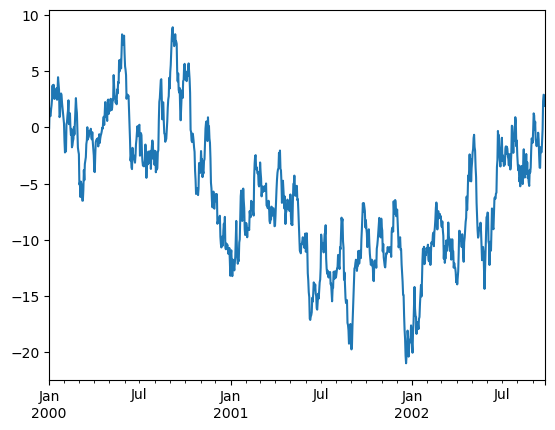

In [94]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

                   A         B         C         D
2000-01-01 -0.113417  0.397689  0.924879  1.534757
2000-01-02 -0.389045 -1.197196 -0.293297  2.162002
2000-01-03 -0.670993 -2.491703  0.762378  2.894715
2000-01-04 -0.924578 -2.392781  1.820556  2.882113
2000-01-05 -0.274788 -1.350809  1.808012  2.031471


<Figure size 640x480 with 0 Axes>

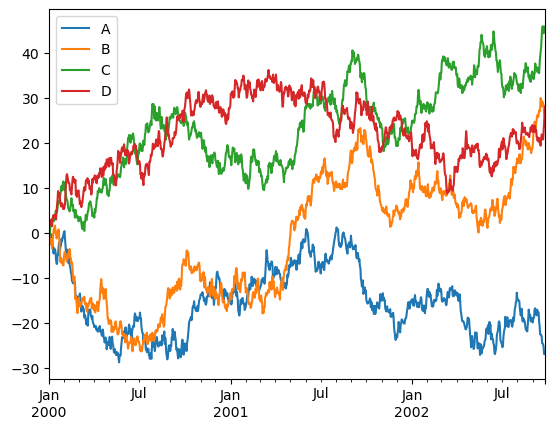

In [95]:
tf = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
tf = tf.cumsum()
print(tf.head())

plt.figure()
tf.plot()
plt.legend(loc='best')

In [96]:
df = sns.load_dataset('diamonds')

<Axes: xlabel='price', ylabel='Count'>

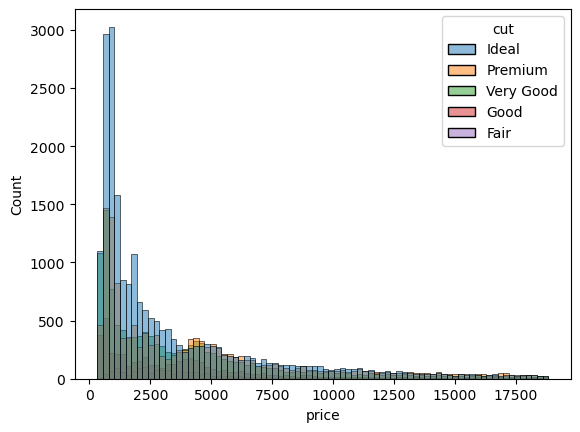

In [97]:
# Histogram of 'price' regarding 'cut'
sns.histplot(df, x='price', hue='cut')

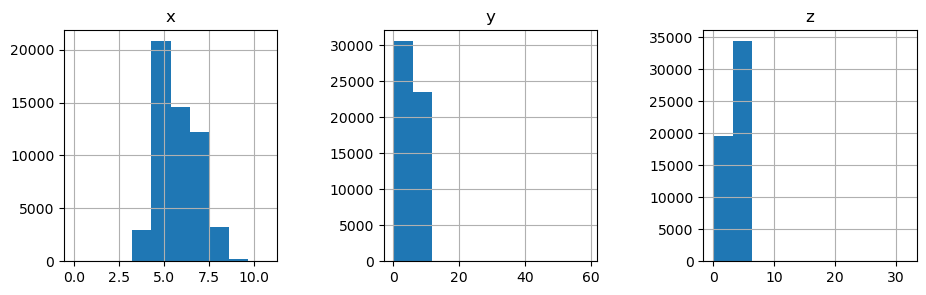

In [98]:
# Histogram of 'x', 'y', 'z' all at once
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 3))
plt.subplots_adjust(wspace=0.5)

cols = ['x', 'y', 'z']

for i in range(3):
    df[cols[i]].hist(ax=axes[i])
    axes[i].set_title(cols[i])

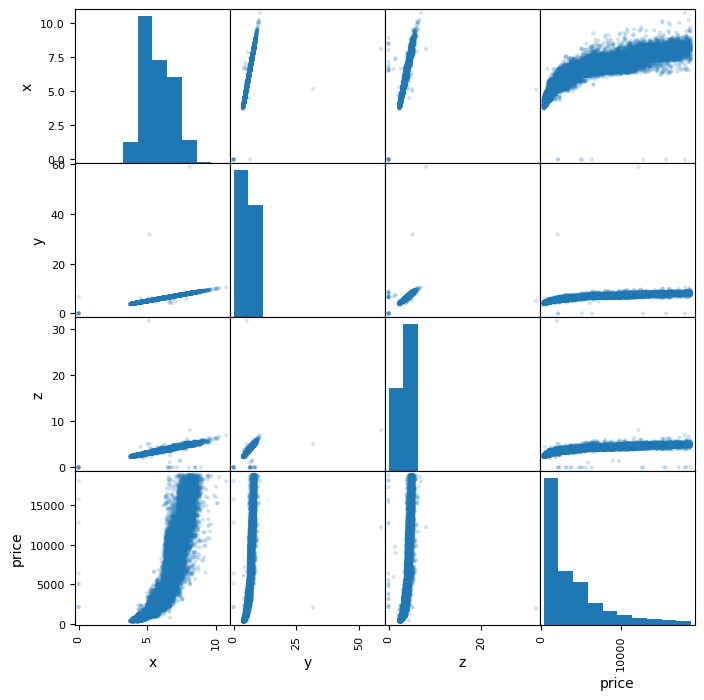

In [99]:
# scatter matrix of 'x', 'y', 'z', 'price'
from pandas.plotting import scatter_matrix
scatter_matrix(df[cols+['price']], alpha=0.2, figsize=(8, 8), diagonal='hist')
plt.show()

### Importing and exporting data

In [101]:
# CSV
df.to_csv('pandas basics.csv')

In [102]:
pd.read_csv('pandas basics.csv')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [103]:
# Parquet
df.to_parquet('pandas basics.parquet')

In [104]:
pd.read_parquet('pandas basics.parquet')

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [105]:
# Excel
df.to_excel('pandas basics.xlsx', sheet_name='Sheet1')

In [106]:
pd.read_excel('pandas basics.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
